In [1]:
import pandas as pd
from rank_algs import *
from metrics import *
import matplotlib.pyplot as plt

In [2]:
def gen_fake_data(s: str, props: dict, k: int=100, seed: float=None):
    rng = np.random.default_rng(seed=seed)
    scores = np.round(rng.uniform(low=0, high=100, size=k)).astype(int)
    counts = {sv: int(pi*k) for sv, pi in props.items()}
    while sum(counts.values()) != k:
        idx = rng.choice(list(counts.keys()), size=1)[0]
        counts[idx] += 1
    attrs = [[sv]*c for sv, c in counts.items()]
    attrs = [item for sublist in attrs for item in sublist]
    df = pd.DataFrame({'score': scores, s: attrs})
    return df

In [3]:
inp = pd.DataFrame(columns = ['a', 'score'])
probs = {'red': 0.7, 'blue': 0.3}
df = gen_fake_data('a', probs, k=100, seed=42)
df.sort_values(by='score', inplace=True, ascending=False)

In [4]:
target_probs = {'red': 0.5, 'blue': 0.5}
print(infeasible_index(df, 'a', target_probs, 10))
df

(9, {2, 3, 4, 5, 6, 7, 8, 9, 10})


,score,a
5,98,red
31,97,red
22,97,red
99,96,blue
11,93,red
...,...,...
74,6,blue
27,4,red
68,3,red
84,2,blue


In [5]:
res = detconstsort(items = df, props = target_probs, kmax = 10, s = 'a')
print(f"Infeasible Index: {infeasible_index(res, 'a', probs, 10)}")
print(f"NCDG: {ndcg(res['score'])}")
res

Infeasible Index: (2, {9, 10})
NCDG: 0.9986769671377959


,score,a
5,98,red
22,97,red
99,96,blue
31,97,red
72,85,blue
11,93,red
82,81,blue
23,89,red
79,78,blue
86,72,blue


In [6]:
res = detcons(items = df, props = target_probs, kmax = 10, s = 'a',relaxed=False)
print(f"Infeasible Index: {infeasible_index(res, 'a', probs, 10)}")
print(f"NCDG: {ndcg(res['score'])}")
res

Infeasible Index: (4, {8, 9, 10, 6})
NCDG: 0.995841023317055


,score,a
5,98,red
99,96,blue
22,97,red
72,85,blue
31,97,red
82,81,blue
11,93,red
79,78,blue
23,89,red


In [7]:
res = detcons(items = df, props = target_probs, kmax = 10, s = 'a',relaxed=True)
print(f"Infeasible Index: {infeasible_index(res, 'a', probs, 10)}")
print(f"NCDG: {ndcg(res['score'])}")
res

Infeasible Index: (4, {8, 9, 10, 6})
NCDG: 0.995841023317055


,score,a
5,98,red
99,96,blue
22,97,red
72,85,blue
31,97,red
82,81,blue
11,93,red
79,78,blue
23,89,red


In [8]:
ii_dg, ii_dc, ii_dcr, ii_dcs = [] ,[] ,[] , []
ndcg_dg, ndcg_dc, ndcg_dcr, ndcg_dcs = [],[],[],[]

for n_a in range(2, 10):
    inp = pd.DataFrame(columns = ['a', 'score'])
    props = {a: 1/n_a for a in range(1, n_a+1)}
    df_ = gen_fake_data('a', props, k=100, seed=42)
    df_.sort_values(by='score', inplace=True, ascending=False)
    dg = detgreedy(items=df_, s='a', props=props, kmax=10)
    dc = detcons(items=df_, s='a', props=props, kmax=10, relaxed=False)
    dcr = detcons(items=df_, s='a', props=props, kmax=10, relaxed=True)
    dcs = detconstsort(items = df_, props = props, kmax = 10, s = 'a')
    
    ii_dg.append(infeasible_index(dg, 'a', props, 10)[0])
    ndcg_dg.append(ndcg(dg['score']))
    ii_dc.append(infeasible_index(dc, 'a', props, 10)[0])
    ndcg_dc.append(ndcg(dc['score']))
    ii_dcr.append(infeasible_index(dcr, 'a', props, 10)[0])
    ndcg_dcr.append(ndcg(dcr['score']))
    ii_dcs.append(infeasible_index(dcs, 'a', props, 10)[0])
    ndcg_dcs.append(ndcg(dcs['score']))

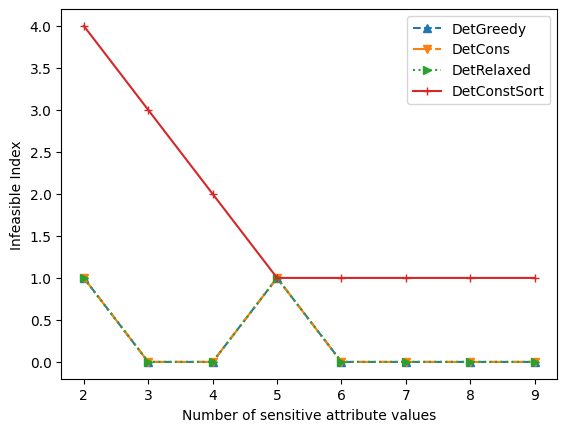

In [9]:
plt.plot(range(2,10), ii_dg, label='DetGreedy', linestyle='--', marker='^')
plt.plot(range(2,10), ii_dc, label='DetCons', linestyle='-.', marker='v')
plt.plot(range(2,10), ii_dcr, label='DetRelaxed', linestyle=':', marker='>')
plt.plot(range(2,10), ii_dcs, label='DetConstSort', linestyle='-', marker='+')
plt.xlabel("Number of sensitive attribute values")
plt.ylabel("Infeasible Index")
plt.legend()

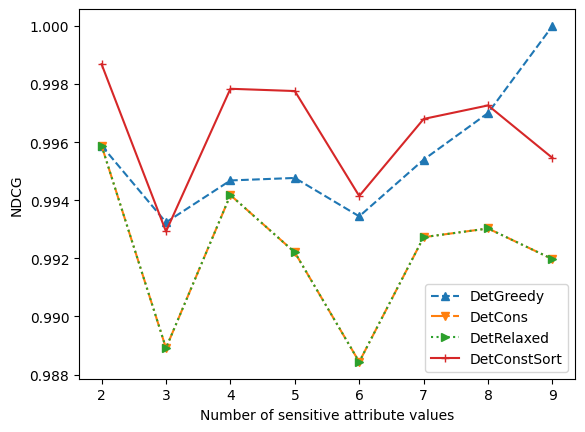

In [10]:
plt.plot(range(2,10), ndcg_dg, label='DetGreedy', linestyle='--', marker='^')
plt.plot(range(2,10), ndcg_dc, label='DetCons', linestyle='-.', marker='v')
plt.plot(range(2,10), ndcg_dcr, label='DetRelaxed', linestyle=':', marker='>')
plt.plot(range(2,10), ndcg_dcs, label='DetConstSort', linestyle='-', marker='+')
plt.xlabel("Number of sensitive attribute values")
plt.ylabel("NDCG")
plt.legend()